In [ ]:
import cv2
import sys
import matplotlib.pyplot as plt
import os 

In [ ]:
# read images, crop and create new dir to store the crops
nimh_path = './new'
out_path = './out'

for folder in os.listdir(nimh_path):
    folder_path = os.path.join(nimh_path, folder)
    if folder == '.ipynb_checkpoints':
        continue 
    display(f'folder_path: {folder_path}')
    
    if os.path.isdir(folder_path):
        display(f'folder: {folder}')
        
        if not os.path.exists(os.path.join(out_path, folder)):
            os.makedirs(os.path.join(out_path, folder))
        
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.jpg'):
                image_path = file_name
                img = cv2.imread(image_path)
                display(file_name)
                gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
                face = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

                for (x, y, w, h) in face:
                    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
                    faces = img[y:y + h, x:x + w] 
                    file_name = os.path.splitext(file_name)[0]
                    cv2.imwrite(f'out/{folder}/{file_name}_cropped.jpg', faces) 

(3008, 1960, 3)

In [3]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_image.shape

(3008, 1960)

In [4]:
face_classifier = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
face = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

for (x, y, w, h) in face:
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    faces = img[y:y + h, x:x + w] 
    cv.imwrite('face.jpg', faces) 
    
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

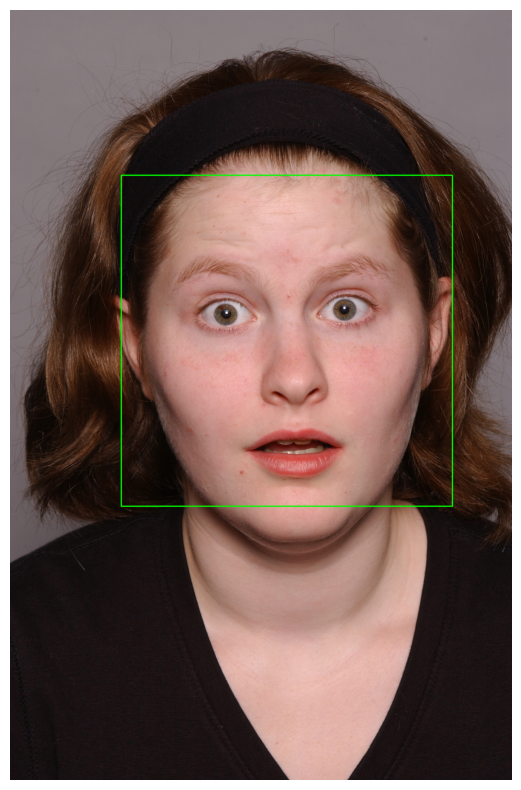

In [5]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

plt.show()